# Disney+ Movie Recommendation System

Hello professors! Welcome to our Machine Learning Mini-Project! Our team, consisting of Priyadharshiny, Kavipooja, and myself (Esvaran) has developed an intricate system for the Disney+ platform that recommends similar movies to users after they've finished watching their favorite titles. Our recommendations will account for characteristics such as the movie description and genre, making for a perfect selection of movies for their next excursion!

Our Problem Statement:

How do we build a content-based recommendation system for Disney+ TV shows and movies that accounts for similarities in genre and description?

We developed a content-based recommendation system that represents unique features of the Disney+ dataset as metadata in the realm of NLP (natural language processing). This set of metadata (description/genre) is converted into strings using a process called vectorization, which inherently assigns a frequency to each word within the string. Afterward, all the vectors are compared against each other in a similarity matrix fundamentally dependent on a metric known as cosine similarity. This analysis yields a list of movies that should be recommended upon watching a particular movie 'A'. Additionally, we need to ensure that the performance of the RS is equivalent for a variety of different users, essentially signifying that the RS shouldn’t perform exceedingly well for certain genres and poorly for others.

## Setting Up the Environment

In [1]:
import pandas as pd
import numpy as num
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as ploty
import random
sb.set()

In [2]:
disney = pd.read_csv('titles.csv')
disney.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],NaN,tt0034492,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",NaN,tt0043067,6.9,8229.0,10.698,6.5


## Data Preparation and Cleaning 

Data Preparation and Cleaning is performed on the data set to foster accuracy and quality of data. Through this process, the issues of redundancy and outliers will be eradicted. In our project, we dropped columns such as 'release_year', 'seasons', 'production_countries', and 'imdb_id' from the dataset. 

#### Dropping of columns and duplicated

In [3]:
disney = disney.drop(columns=['release_year', 'seasons', 'production_countries', 'imdb_id']) #These columns aren't necessary for evaluation.
disney = disney[disney.type != 'SHOW'] #Selects all of the Disney+ Movies
disney = disney.dropna(subset = ['description'])
disney = disney.drop_duplicates(subset=['title']) 
disney.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 0 to 1534
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1097 non-null   object 
 1   title              1097 non-null   object 
 2   type               1097 non-null   object 
 3   description        1097 non-null   object 
 4   age_certification  841 non-null    object 
 5   runtime            1097 non-null   int64  
 6   genres             1097 non-null   object 
 7   imdb_score         727 non-null    float64
 8   imdb_votes         724 non-null    float64
 9   tmdb_popularity    1094 non-null   float64
 10  tmdb_score         1054 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 102.8+ KB


#### Extracting Required Variables

Below is the extraction of some important variables required for our data exploration. These extractions allow us to have a closer look at the data values of these columns.

In [4]:
disneyData = pd.DataFrame(disney[['runtime', 'imdb_score','imdb_votes', 'tmdb_popularity', 'tmdb_score']])
disneyData.head()

,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,120,7.7,94681.0,57.751,7.4
1,83,7.6,195321.0,107.137,7.1
2,88,7.5,141937.0,71.160,7.1
3,70,7.3,140406.0,68.136,7.0
4,96,6.9,8229.0,10.698,6.5


## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data science process. Through analyzing our data, we can gain better insights and clarifications on the trends and patterns of values within a dataset. It involves classifying the data to understand variations across the different categories, which depend on numerous factors. In our project, we conducted data analysis on some of the key variables that play a major role in the development of our recommendation system. The three variables are imdb_score, runtime, and age certification, respectively. Through the usage of different visualizations for each variable for exploratory analysis, observations on the distribution of data can be understood in a more efficient manner. 

#### Exploring _imdb_score_

This table shows the TOP 5 imdb_title with the highest imdb_score. This allows us to identify the TOP 5 shows that enable us to have a clearer visualization of the trending movies. This variable could potentially assist us when we develop the recommendation system, given the user's preferences for higher-rated movies.

In [5]:
top5_imdb = disney.sort_values(by='imdb_score', ascending=False, ignore_index=True).head()
pd.DataFrame(list(zip(top5_imdb['title'], top5_imdb['imdb_score'])),columns=['title', 'IMDB Score']).set_index('title')

,IMDB Score
title,
ASSEMBLED: The Making of Hawkeye,8.8
The Empire Strikes Back,8.7
Star Wars,8.6
The Lion King,8.5
Avengers: Endgame,8.4


**OBSERVATIONS:**
From the TOP 5 analysis, 
- The top movie is ASSEMBLED: The Making of Hawkeye with the highest imdb score of 8.8.
- The top 5 movies have a range from 8.8 to 8.4 imdb score.

Moreover, the violin plot can be used to statistically show the distribution of quantitative data across different values of categorical variables, which further helps us to compare the values. For the imdb_score, the violin plot has been used to illustrate the density of the data at different values which further helps us understand the skewness in the data. 

<AxesSubplot: xlabel='imdb_score'>

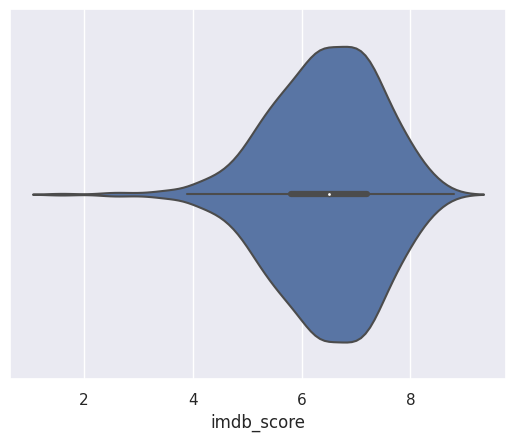

In [6]:
sb.violinplot(x=disney["imdb_score"])

**OBSERVATIONS:**
From the violin plot, 
- The ratings that have the highest frequency lie between 6 and 8.
- The ratings that have the lowest frequency lie between 4 and 6. 

#### Analysis of Central Tendency Across Variables

The central tendency of the below variables emphasizes a more precise computation that eventually measures the dispersion. This would be an easy process for the calculation of the mean, median, and mode of the numeric values. 

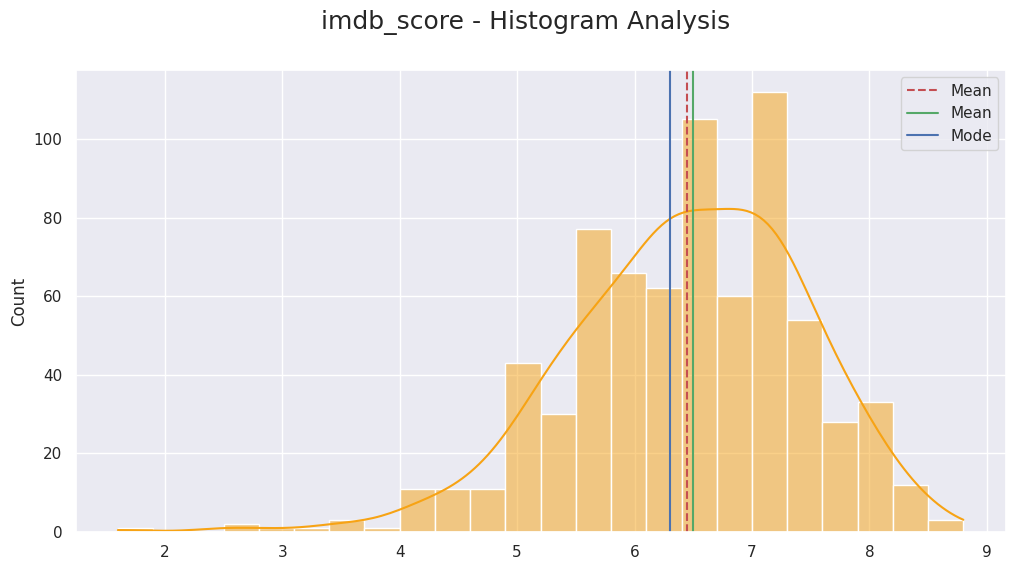

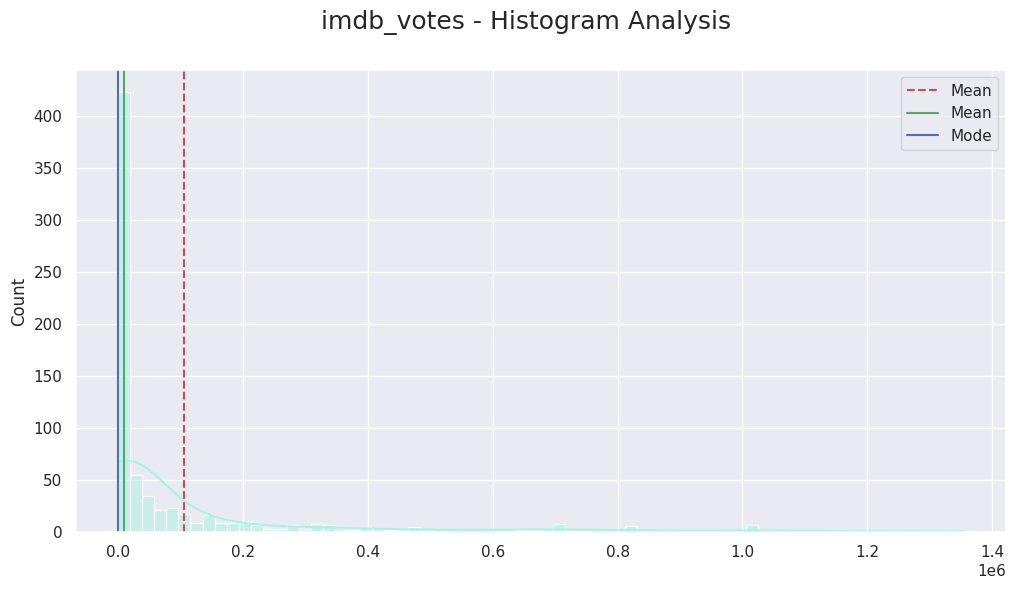

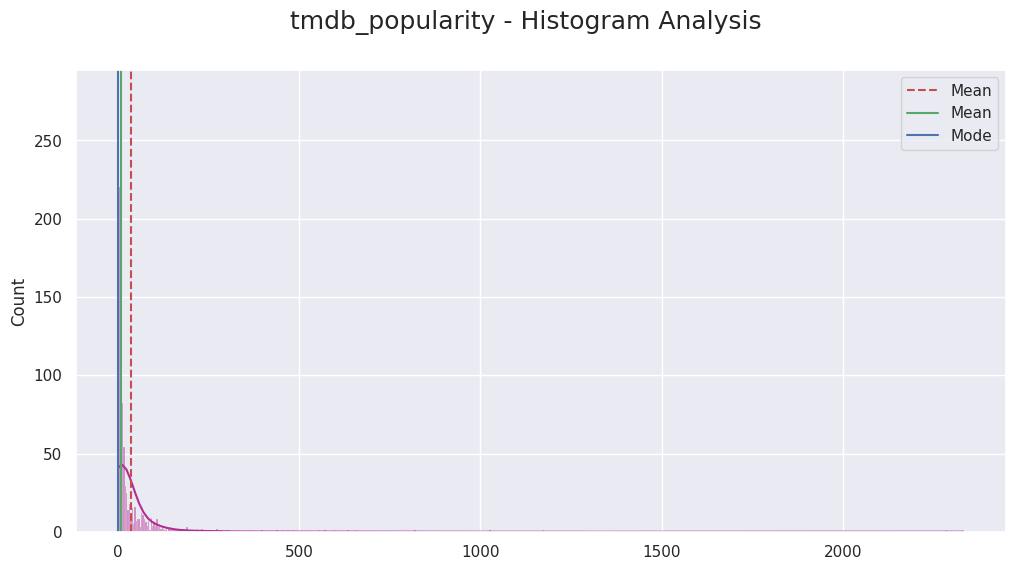

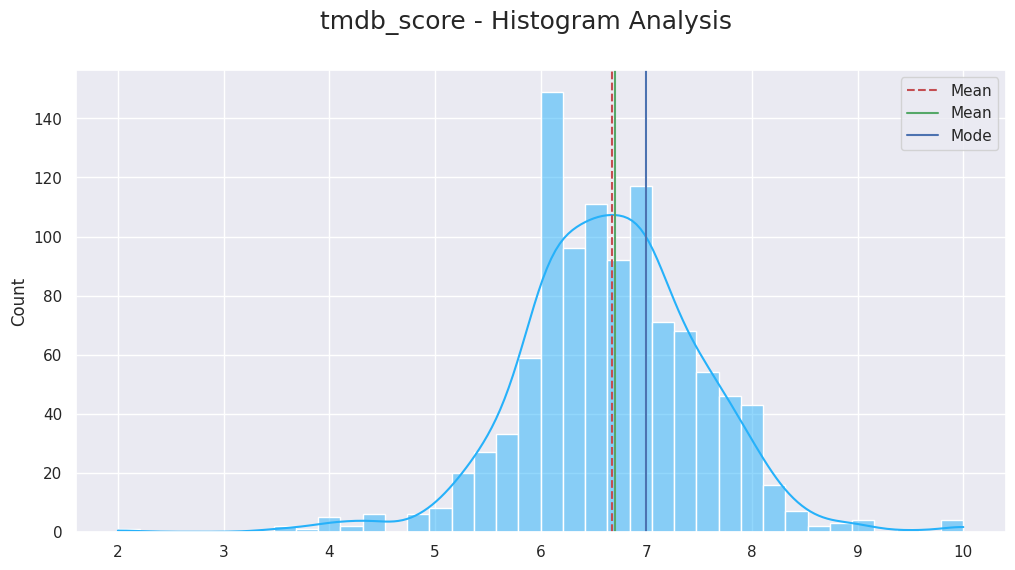

In [7]:
def get_random_color():
    r1 = lambda: random.randint(0 ,255)
    return '#%02X%02X%02X' % (r1(),r1(),r1())
    
def histplot_central_tendency(df: dict, fields: list):
    for field in fields:
        f, (ax1) = plt.subplots(1, 1, figsize=(12, 6))
        v_dist_1 = df[field].values
        sb.histplot(v_dist_1, ax=ax1, color=get_random_color(), kde=True)

        mean=df[field].mean()
        median=df[field].median()
        mode=df[field].mode().values[0]

        ax1.axvline(mean, color='r', linestyle='--', label="Mean")
        ax1.axvline(median, color='g', linestyle='-', label="Mean")
        ax1.axvline(mode, color='b', linestyle='-', label="Mode")
        ax1.legend()
        #plt.grid()
        plt.plot(color="white", lw=3)
        plt.suptitle(f"{field} - Histogram Analysis", fontsize=18)
        
histplot_central_tendency(disney, ['imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'])

**OBSERVATIONS:**
From the histplot, showing the central tendency of the data we are able to identify the distribution of data, the mean, median & mode of the variables for imdb_score,for imdb_votes,for tmdb_popularity and for tmdb_score.

#### Exploring _genre_

This is a bar chart depicting the distribution of the different genres based on their popularity in descending order. The exploration of the genres aims to help us visualize the most popular genre based on how they're sorted.

In [8]:
genre_p = dict()
for i in disney['genres']:
    i = i.replace("'", "").replace('"', "")
    i = list(i.replace('[', '').replace(']', '').split(","))
    for genre in i:
        if genre not in genre_p:
            genre_p[genre] = 0
        genre_p[genre] += 1
     
    
df_genre = {'genre': []
            , 'count': []}
genre_p = {k: v for k, v in sorted(genre_p.items(), reverse = False, key = lambda item: item[1])}
for i, j in genre_p.items():
    df_genre['genre'].append(i)
    df_genre['count'].append(j)

x=ploty.bar(df_genre, y='genre', x='count', title='Analysis of Genre')
x.show()

**OBSERVATIONS:**
From the barchart plot (ordered from most to least popular genre, in descending order )
- The most popular genre is "family" with a count of 484.
- "comedy", "animation", "fantasy" falls as the next top 3 genres after "family".
- The least popular genre is "crime" with a count of only 3.

#### Exploring _runtime_

The histogram plot is used here to provide a visual representation of the distribution of data. It's helpful for analyzing the shape and spread of the dataset. For instance, this plot provides a concise and visual summary of the number of movies whose runtime is distributed across various values along the x-axis. 

<AxesSubplot: xlabel='runtime', ylabel='Count'>

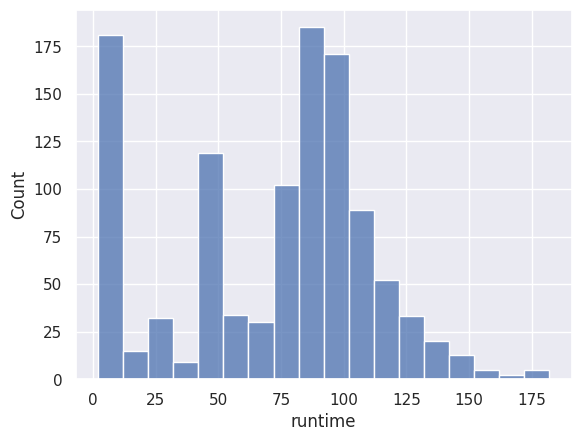

In [9]:
sb.histplot(data=disney, x="runtime")

**OBSERVATIONS:**
From the histogram plot, 
(The runtime of the movies are given in terms of minutes.)
- More than 175 movies have a runtime that is above 87 and below 100. 
- Next to that, close to 175 movies have a runtime that is between 0 and 12. 
- Movies whose runtime is between 150 and 175 are the ones which are lower in frequency. 

#### Exploring _age_certification_

To provide an illustration on the count for different categories of age certification for the movies, countplot() has been used. Through countplot(), the frequency of categorical values can be identified. For example, the countplot below shows the number of movies categorized for each age_recommendation such as G, PG and PG-13.

<AxesSubplot: xlabel='age_certification', ylabel='count'>

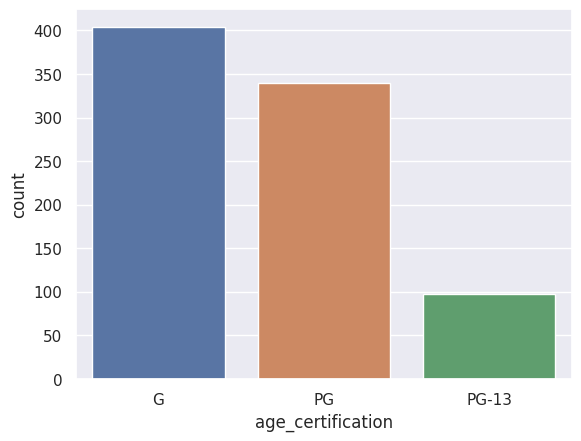

In [10]:
sb.countplot(x=disney["age_certification"])

**OBSERVATIONS:**
From the countplot, 
Details on the number of movies categorized as G, PG and PG-13 in terms of age_certification is provided. 
- Almost 100 movies are categorized under PG-13. 
- Almost 350 movies are categorized under PG. 
- Almost 400 movies are categorized under G.

#### Analysis of the Relationship between age_certification and imdb_score

A bivariate histogram with a heatmap is a 2-D space that provides an illustration of the relationship between two variables and shows the most concentrated observations. The plot displayed below has been used to find the relationship between age_certification and imdb_score.

<AxesSubplot: xlabel='age_certification', ylabel='imdb_score'>

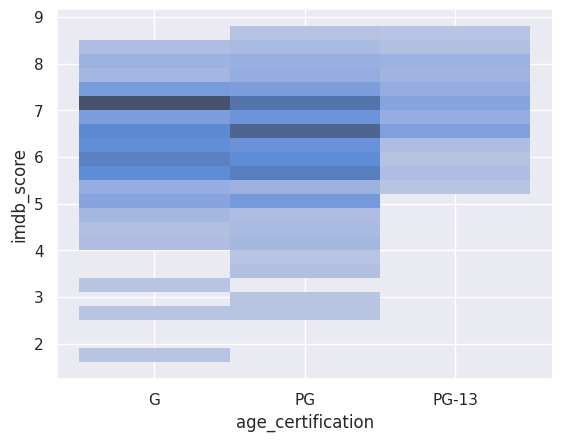

In [11]:
sb.histplot(disney,x="age_certification",y='imdb_score')

OBSERVATIONS:

From the histplot,
It is evident that movies with an age certification of G have a greater imdb_score compared to the others. This trend is observable from the graph as there's a larger concentration of color at that section. This could inherently be because G-rated movies tend to include genres such as animation, family, and fantasy, which have a strong appeal to certain audiences and result in higher ratings. Next to that, a higher imdb_score has been observed for PG that is between 6 and 7 and slightly above 7.

#### Analysis of the Relationship Between runtime and imdb_score 

The line plot is used here to show how a variable changes periodically and how one variable is influenced by another. Here, we have compared two variables, namely the runtime and imdb_score.

<AxesSubplot: xlabel='runtime', ylabel='imdb_score'>

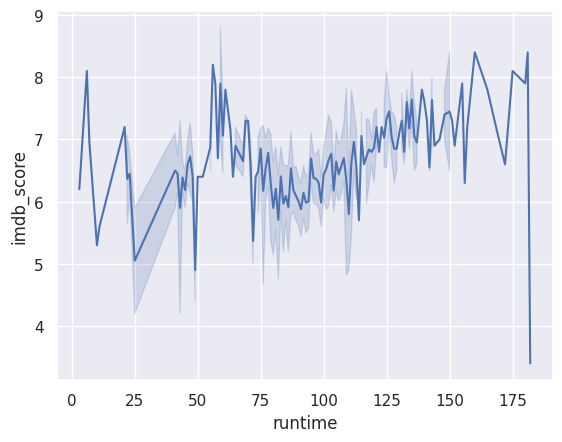

In [12]:
sb.lineplot(data=disney, x="runtime", y="imdb_score")

**OBSERVATIONS**:
From the lineplot, 
There is an evident relationship between imdb_score and runtime. It's clear that movies with a runtime between 150 and 175 minutes have a higher imdb_score. Similarly, movies with a runtime between 0 and 25 minutes and between 50 and 75 minutes have a higher imdb_score.

## Vectorization Techniques

Prior to initializing the vectorizers, let's understand the notion of cosine similarity. Mathematically, cosine similarity measures the similarity between two non-zero vectors within a Euclidean inner-product space. Essentially, the scalar product formula has been rearranged to solve for cos(θ), which indicates the directional equivalence of the given vectors. This attribute is a powerful tool for determining similarity in documents and for textual analysis. 

Within this particular dataset, the description provided for each movie (row) represents a string of attributes that can be individually analyzed. We're attempting to total the frequency for each unique word that appears, ultimately constructing a term-frequency vector.

For instance, consider the description of the movie Bambi: "Bambi's tale unfolds from season to season as the young prince of the forest learns about life, love, and friends." This sentence can be categorized into the following distribution.

Document	Bambi's  tale  unfolds  from  season  to  as  the  young  prince  of  forest  learns  about  life  love  and  friends
Bambi      	     1           1         1          1           2        1    1    2        1           1       1       1          1           1       1       1       1        1  

### Initialization of Vectorizers

First, let's initialize the TF-IDF (Term Frequency - Inverse Document Frequency) vectorizer, which is an object utilized to determine the significance of each word within the movie description by comparing it against all movies within the dataset. This particular vectorizer increases the importance of a particular word w if it's unique to a certain movie's description, thereby decreasing the significance of common words, such as 'a', 'the', 'and', etc.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizerTF = TfidfVectorizer()
vectorizedTF = vectorizerTF.fit_transform(disney['description'])

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

similaritiesTF = cosine_similarity(vectorizedTF)

print(similaritiesTF)

[[1.         0.04257928 0.02734134 ... 0.0185537  0.03768828 0.02471722]
 [0.04257928 1.         0.0187942  ... 0.16016232 0.04856555 0.03695879]
 [0.02734134 0.0187942  1.         ... 0.0280489  0.01541093 0.01625423]
 ...
 [0.0185537  0.16016232 0.0280489  ... 1.         0.04682715 0.03997809]
 [0.03768828 0.04856555 0.01541093 ... 0.04682715 1.         0.03124309]
 [0.02471722 0.03695879 0.01625423 ... 0.03997809 0.03124309 1.        ]]


Now, let's initialize another vectorizer, the CountVectorizer. Unlike TFIDF, the CountVectorizer simply denotes the frequency of each word within the description, providing equal importance to all words, including common occurrences. The idea behind this vectorizer is to determine the words that appear most frequently within the string.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizerCV = CountVectorizer()
vectorizedCV = vectorizerCV.fit_transform(disney['description'])

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

similaritiesCV = cosine_similarity(vectorizedCV)

print(similaritiesCV)

[[1.         0.38334909 0.18731716 ... 0.25       0.38385797 0.28401878]
 [0.38334909 1.         0.16571045 ... 0.42389562 0.41702883 0.28552012]
 [0.18731716 0.16571045 1.         ... 0.14048787 0.15137513 0.14509525]
 ...
 [0.25       0.42389562 0.14048787 ... 1.         0.32829958 0.16137431]
 [0.38385797 0.41702883 0.15137513 ... 0.32829958 1.         0.31298432]
 [0.28401878 0.28552012 0.14509525 ... 0.16137431 0.31298432 1.        ]]


### Comparison Between Vectorizers

In the following segment, I constructed similarity matrices for the following cases:

1. Only TF-IDF

undefined. Only CountVectorizer

undefined. TF-IDF + CountVectorizer

The purpose of constructing different matrices for these cases is to illustrate how recommendation systems can vary vastly depending on the mechanism we utilize to assign importance to words within the string. After deliberation, it's evident that the TF-IDF vector performs the best since it can appropriately assign importance to words unique to that particular description.

In [17]:
#Ensures that the movie the user watched exists in the list of titles on Disney+.
input_movie = input('What movie did you just finish watching? ')
while input_movie not in disney['title'].values:
    input_movie = input('Sorry, I couldn\'t find that title. Try again? ')

Similarity Matrix for TF-IDF Vectorizer

In [18]:
simTF = pd.DataFrame(similaritiesTF, columns = disney['title'], index = disney['title']).reset_index()

simTF

title,title,Fantasia,Snow White and the Seven Dwarfs,Pinocchio,Bambi,Treasure Island,The Adventures of Ichabod and Mr. Toad,Cinderella,Dumbo,The Three Caballeros,...,Russia's Wild Tiger,A Spark Story,Shark Gangs,Own the Room,Built for Mars: The Perseverance Rover,Killer Shark vs. Killer Whale,Far From Raven's Home,World's Most Dangerous Shark?,The Magic Maker,Smoky Mountain Park Rangers
0,Fantasia,1.000000,0.042579,0.027341,0.046266,0.017255,0.068256,0.069537,0.065249,0.016747,...,0.047875,0.045552,0.021281,0.012865,0.023034,0.034770,0.044484,0.018554,0.037688,0.024717
1,Snow White and the Seven Dwarfs,0.042579,1.000000,0.018794,0.092613,0.019668,0.093899,0.083817,0.027718,0.011436,...,0.069462,0.034376,0.041270,0.019165,0.037356,0.100775,0.035537,0.160162,0.048566,0.036959
2,Pinocchio,0.027341,0.018794,1.000000,0.033940,0.005873,0.031135,0.077497,0.024126,0.024689,...,0.042381,0.047641,0.012241,0.012631,0.008386,0.012863,0.067943,0.028049,0.015411,0.016254
3,Bambi,0.046266,0.092613,0.033940,1.000000,0.016824,0.061965,0.092056,0.053005,0.010314,...,0.039906,0.034389,0.031088,0.044197,0.024237,0.029385,0.034213,0.019102,0.034633,0.031883
4,Treasure Island,0.017255,0.019668,0.005873,0.016824,1.000000,0.026337,0.023403,0.011974,0.005567,...,0.031018,0.014636,0.021690,0.010828,0.014860,0.019898,0.009426,0.012331,0.056962,0.012573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,Killer Shark vs. Killer Whale,0.034770,0.100775,0.012863,0.029385,0.019898,0.047854,0.031830,0.018401,0.020222,...,0.065929,0.024596,0.214279,0.023308,0.026217,1.000000,0.029032,0.220346,0.043416,0.079595
1093,Far From Raven's Home,0.044484,0.035537,0.067943,0.034213,0.009426,0.055687,0.041700,0.014576,0.008850,...,0.050268,0.048928,0.017879,0.029341,0.021610,0.029032,1.000000,0.012373,0.026642,0.023197
1094,World's Most Dangerous Shark?,0.018554,0.160162,0.028049,0.019102,0.012331,0.036655,0.036741,0.031406,0.013559,...,0.045047,0.013069,0.058637,0.039660,0.023676,0.220346,0.012373,1.000000,0.046827,0.039978
1095,The Magic Maker,0.037688,0.048566,0.015411,0.034633,0.056962,0.062496,0.051596,0.028340,0.018759,...,0.082462,0.038835,0.030270,0.079242,0.029523,0.043416,0.026642,0.046827,1.000000,0.031243


Top 10 Movie Recommendations (Using TF-IDF)

In [19]:
recosTF = pd.DataFrame(simTF.nlargest(11, input_movie)['title'])
recosTF = recosTF[recosTF['title'] != input_movie]
print(recosTF)

                                          title
332    The Little Mermaid II: Return to the Sea
205                                      Splash
425    The Chronicles of Narnia: Prince Caspian
507       The Little Mermaid: Ariel's Beginning
290      The Brave Little Toaster to the Rescue
512                      George of the Jungle 2
5        The Adventures of Ichabod and Mr. Toad
126  The Story of Robin Hood and His Merrie Men
701                  The Day the Series Stopped
775                   Ice Age: Collision Course


Similarity Matrix for Count Vectorizer

In [20]:
simCV = pd.DataFrame(similaritiesCV, columns = disney['title'], index = disney['title']).reset_index()

simCV

title,title,Fantasia,Snow White and the Seven Dwarfs,Pinocchio,Bambi,Treasure Island,The Adventures of Ichabod and Mr. Toad,Cinderella,Dumbo,The Three Caballeros,...,Russia's Wild Tiger,A Spark Story,Shark Gangs,Own the Room,Built for Mars: The Perseverance Rover,Killer Shark vs. Killer Whale,Far From Raven's Home,World's Most Dangerous Shark?,The Magic Maker,Smoky Mountain Park Rangers
0,Fantasia,1.000000,0.383349,0.187317,0.346410,0.244949,0.500870,0.424264,0.357771,0.212132,...,0.423030,0.380132,0.277350,0.158114,0.317038,0.390007,0.283683,0.250000,0.383858,0.284019
1,Snow White and the Seven Dwarfs,0.383349,1.000000,0.165710,0.404347,0.255820,0.560024,0.490009,0.313206,0.139010,...,0.547865,0.329690,0.368037,0.209814,0.450752,0.405906,0.289570,0.423896,0.417029,0.285520
2,Pinocchio,0.187317,0.165710,1.000000,0.189258,0.095590,0.211099,0.238416,0.230370,0.154529,...,0.224872,0.230370,0.103905,0.118470,0.127257,0.128921,0.204380,0.140488,0.151375,0.145095
3,Bambi,0.346410,0.404347,0.189258,1.000000,0.235702,0.421717,0.408248,0.290474,0.136083,...,0.379557,0.322749,0.280224,0.228218,0.326860,0.331133,0.251976,0.252591,0.349927,0.260875
4,Treasure Island,0.244949,0.255820,0.095590,0.235702,1.000000,0.315239,0.274241,0.205396,0.096225,...,0.315063,0.228218,0.226455,0.161374,0.254238,0.280976,0.155902,0.204124,0.329914,0.184466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,Killer Shark vs. Killer Whale,0.390007,0.405906,0.128921,0.331133,0.280976,0.459630,0.373109,0.256495,0.216295,...,0.511478,0.307794,0.445399,0.217643,0.363667,1.000000,0.225282,0.458831,0.440315,0.325792
1093,Far From Raven's Home,0.283683,0.289570,0.204380,0.251976,0.155902,0.346113,0.277746,0.195180,0.077152,...,0.324342,0.292770,0.181568,0.207020,0.271791,0.225282,1.000000,0.190941,0.242477,0.169031
1094,World's Most Dangerous Shark?,0.250000,0.423896,0.140488,0.252591,0.204124,0.375653,0.335876,0.251558,0.117851,...,0.443038,0.195656,0.277350,0.197642,0.367990,0.458831,0.190941,1.000000,0.328300,0.161374
1095,The Magic Maker,0.383858,0.417029,0.151375,0.349927,0.329914,0.505955,0.414286,0.316228,0.190476,...,0.508170,0.361403,0.336199,0.319438,0.366007,0.440315,0.242477,0.328300,1.000000,0.312984


Top 10 Movie Recommendations (Using Count)

In [21]:
recosCV = pd.DataFrame(simCV.nlargest(11, input_movie)['title'])
recosCV = recosCV[recosCV['title'] != input_movie]
print(recosCV)

                                         title
290     The Brave Little Toaster to the Rescue
35                The Grasshopper and the Ants
425   The Chronicles of Narnia: Prince Caspian
215                         The Ewok Adventure
5       The Adventures of Ichabod and Mr. Toad
447       Confessions of a Teenage Drama Queen
1087                       Russia's Wild Tiger
794                        Of Miracles and Men
607                              Sacred Planet
799                      Drain The Ocean: WWII


Similarity Matrix for TF-IDF + Count Vectorizer

In [22]:
#movieTitles = pd.DataFrame(disney['title']) Extracts the movie titles to append to the corresponding similarity matrix.
resultant = num.multiply(similaritiesTF, similaritiesCV)

resMatrix = pd.DataFrame(resultant, columns = disney['title'], index = disney['title']).reset_index()

resMatrix

title,title,Fantasia,Snow White and the Seven Dwarfs,Pinocchio,Bambi,Treasure Island,The Adventures of Ichabod and Mr. Toad,Cinderella,Dumbo,The Three Caballeros,...,Russia's Wild Tiger,A Spark Story,Shark Gangs,Own the Room,Built for Mars: The Perseverance Rover,Killer Shark vs. Killer Whale,Far From Raven's Home,World's Most Dangerous Shark?,The Magic Maker,Smoky Mountain Park Rangers
0,Fantasia,1.000000,0.016323,0.005122,0.016027,0.004227,0.034188,0.029502,0.023344,0.003553,...,0.020253,0.017316,0.005902,0.002034,0.007302,0.013561,0.012619,0.004638,0.014467,0.007020
1,Snow White and the Seven Dwarfs,0.016323,1.000000,0.003114,0.037448,0.005031,0.052586,0.041071,0.008681,0.001590,...,0.038056,0.011334,0.015189,0.004021,0.016838,0.040905,0.010291,0.067892,0.020253,0.010552
2,Pinocchio,0.005122,0.003114,1.000000,0.006423,0.000561,0.006573,0.018476,0.005558,0.003815,...,0.009530,0.010975,0.001272,0.001496,0.001067,0.001658,0.013886,0.003941,0.002333,0.002358
3,Bambi,0.016027,0.037448,0.006423,1.000000,0.003965,0.026132,0.037582,0.015396,0.001404,...,0.015147,0.011099,0.008712,0.010087,0.007922,0.009730,0.008621,0.004825,0.012119,0.008317
4,Treasure Island,0.004227,0.005031,0.000561,0.003965,1.000000,0.008303,0.006418,0.002459,0.000536,...,0.009772,0.003340,0.004912,0.001747,0.003778,0.005591,0.001470,0.002517,0.018793,0.002319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,Killer Shark vs. Killer Whale,0.013561,0.040905,0.001658,0.009730,0.005591,0.021995,0.011876,0.004720,0.004374,...,0.033721,0.007571,0.095440,0.005073,0.009534,1.000000,0.006540,0.101102,0.019117,0.025931
1093,Far From Raven's Home,0.012619,0.010291,0.013886,0.008621,0.001470,0.019274,0.011582,0.002845,0.000683,...,0.016304,0.014325,0.003246,0.006074,0.005874,0.006540,1.000000,0.002362,0.006460,0.003921
1094,World's Most Dangerous Shark?,0.004638,0.067892,0.003941,0.004825,0.002517,0.013770,0.012340,0.007900,0.001598,...,0.019957,0.002557,0.016263,0.007839,0.008712,0.101102,0.002362,1.000000,0.015373,0.006451
1095,The Magic Maker,0.014467,0.020253,0.002333,0.012119,0.018793,0.031620,0.021375,0.008962,0.003573,...,0.041905,0.014035,0.010177,0.025313,0.010805,0.019117,0.006460,0.015373,1.000000,0.009779


Top 10 Movie Recommendations (Using Both)

In [23]:
recosRes = pd.DataFrame(resMatrix.nlargest(11, input_movie)['title'])
recosRes = recosRes[recosRes['title'] != input_movie]
print(recosRes)

                                          title
425    The Chronicles of Narnia: Prince Caspian
332    The Little Mermaid II: Return to the Sea
290      The Brave Little Toaster to the Rescue
205                                      Splash
5        The Adventures of Ichabod and Mr. Toad
35                 The Grasshopper and the Ants
701                  The Day the Series Stopped
762                     Avengers: Age of Ultron
126  The Story of Robin Hood and His Merrie Men
775                   Ice Age: Collision Course


After our preliminary analysis of the different vectorizers, it's evident that the TF-IDF vectorizer performs the best. This is most likely because of the complexity of the description and the existence of unique words. If we were to recommend movies based on similarities in their titles; however, the CountVectorizer might be more useful. 

## Creating the Recommendation System

Using the TF-IDF vectorizer, we're going to create our final recommendation system that'll account for certain characteristics we didn't previously acknowledge.

In [24]:
disTitles = pd.read_csv('titles.csv')
disTitles = disTitles.drop(columns=['release_year', 'seasons', 'production_countries', 'imdb_id']) #These columns aren't necessary for evaluation.
disTitles = disTitles[disTitles.type != 'SHOW'] #Selects all of the Disney+ Movies
disTitles = disTitles.dropna(subset = ['description'])
disTitles.head()

,id,title,type,description,age_certification,runtime,genres,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,G,120,"['animation', 'family', 'music', 'fantasy']",7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",G,83,"['fantasy', 'family', 'romance', 'animation', ...",7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,G,88,"['animation', 'comedy', 'family', 'fantasy']",7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,G,70,"['animation', 'drama', 'family']",7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,PG,96,"['family', 'action']",6.9,8229.0,10.698,6.5


In addition to analyzing the description, we'll account for the movie title (for recommending sequels) and the genre. This will permit the system to make higher-quality recommendations that consider the user's interests as well.

In [25]:
qualities = ['title', 'description', 'genres']

def accumulate_string(frame):
    combine = "";
    for feature in qualities:
        combine += frame[feature] + ' \ ';

    return combine;

disTitles['description'] = disTitles.apply(accumulate_string, axis = 1)
disTitles['description'].head()

0    Fantasia \ Walt Disney's timeless masterpiece ...
1    Snow White and the Seven Dwarfs \ A beautiful ...
2    Pinocchio \ Lonely toymaker Geppetto has his w...
3    Bambi \ Bambi's tale unfolds from season to se...
4    Treasure Island \ Enchanted by the idea of loc...
Name: description, dtype: object

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
vectorized = vectorizer.fit_transform(disTitles['description'])
similarities = cosine_similarity(vectorized)

Similarity Matrix for Recommendation System

In [27]:
sim = pd.DataFrame(similarities, columns = disTitles['title'], index = disTitles['title']).reset_index()
sim

title,title,Fantasia,Snow White and the Seven Dwarfs,Pinocchio,Bambi,Treasure Island,The Adventures of Ichabod and Mr. Toad,Cinderella,Dumbo,The Three Caballeros,...,Russia's Wild Tiger,A Spark Story,Shark Gangs,Own the Room,Built for Mars: The Perseverance Rover,Killer Shark vs. Killer Whale,Far From Raven's Home,World's Most Dangerous Shark?,The Magic Maker,Smoky Mountain Park Rangers
0,Fantasia,1.000000,0.046332,0.032280,0.044340,0.016365,0.066758,0.067208,0.066660,0.030826,...,0.038667,0.048831,0.015857,0.015592,0.016971,0.024912,0.041813,0.014025,0.033134,0.015612
1,Snow White and the Seven Dwarfs,0.046332,1.000000,0.023492,0.081246,0.018649,0.084800,0.081261,0.036839,0.028787,...,0.058354,0.038398,0.031651,0.043431,0.028699,0.093946,0.036137,0.164302,0.046527,0.024441
2,Pinocchio,0.032280,0.023492,1.000000,0.034077,0.006801,0.033779,0.072778,0.030427,0.035943,...,0.036105,0.049760,0.009512,0.011971,0.006037,0.009433,0.064335,0.022596,0.013356,0.010601
3,Bambi,0.044340,0.081246,0.034077,1.000000,0.016121,0.056410,0.078187,0.059572,0.022131,...,0.030280,0.041571,0.022409,0.039303,0.016700,0.019825,0.041063,0.013682,0.028897,0.019368
4,Treasure Island,0.016365,0.018649,0.006801,0.016121,1.000000,0.026110,0.021916,0.012312,0.009177,...,0.026479,0.012814,0.017408,0.012016,0.011160,0.014897,0.007966,0.009818,0.050234,0.008299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,Killer Shark vs. Killer Whale,0.024912,0.093946,0.009433,0.019825,0.014897,0.040324,0.023807,0.013596,0.019203,...,0.054772,0.026327,0.191821,0.033360,0.023421,1.000000,0.021992,0.197151,0.035123,0.053731
1114,Far From Raven's Home,0.041813,0.036137,0.064335,0.041063,0.007966,0.056289,0.044027,0.016845,0.018435,...,0.043271,0.054009,0.014232,0.028840,0.019895,0.021992,1.000000,0.009792,0.024367,0.015625
1115,World's Most Dangerous Shark?,0.014025,0.164302,0.022596,0.013682,0.009818,0.031683,0.029956,0.025734,0.015305,...,0.041640,0.018575,0.084158,0.088096,0.023550,0.197151,0.009792,1.000000,0.058397,0.032203
1116,The Magic Maker,0.033134,0.046527,0.013356,0.028897,0.050234,0.063379,0.047219,0.025398,0.022054,...,0.076215,0.035508,0.025660,0.074981,0.026367,0.035123,0.024367,0.058397,1.000000,0.020982


Top 10 Movie Recommendations (Final System)

In [28]:
recos = pd.DataFrame(sim.nlargest(11, input_movie))
recos = recos[recos['title'] != input_movie]
recos = recos.set_index(pd.Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))
recos

title,title,Fantasia,Snow White and the Seven Dwarfs,Pinocchio,Bambi,Treasure Island,The Adventures of Ichabod and Mr. Toad,Cinderella,Dumbo,The Three Caballeros,...,Russia's Wild Tiger,A Spark Story,Shark Gangs,Own the Room,Built for Mars: The Perseverance Rover,Killer Shark vs. Killer Whale,Far From Raven's Home,World's Most Dangerous Shark?,The Magic Maker,Smoky Mountain Park Rangers
1,The Little Mermaid II: Return to the Sea,0.042041,0.081447,0.019522,0.084781,0.024810,0.086335,0.096177,0.032152,0.036075,...,0.075331,0.055417,0.041045,0.020919,0.022835,0.029777,0.050587,0.022449,0.039449,0.038106
2,Splash,0.020243,0.053637,0.042504,0.039629,0.008017,0.090880,0.051806,0.023299,0.039805,...,0.057476,0.010137,0.053752,0.036391,0.018615,0.014020,0.016284,0.016635,0.041245,0.017056
3,The Little Mermaid Live!,0.089773,0.052715,0.022746,0.068668,0.020136,0.066265,0.072396,0.030839,0.033993,...,0.045546,0.016302,0.017792,0.022714,0.024580,0.026761,0.020008,0.023031,0.044565,0.009646
4,The Little Mermaid: Ariel's Beginning,0.040981,0.081603,0.043301,0.033407,0.013414,0.053730,0.088585,0.027131,0.039726,...,0.031179,0.016178,0.008434,0.011575,0.022186,0.017216,0.035572,0.011966,0.023608,0.011082
5,The Chronicles of Narnia: Prince Caspian,0.061438,0.061833,0.036720,0.095494,0.048281,0.106773,0.063419,0.037062,0.045692,...,0.081795,0.042449,0.025821,0.062857,0.034101,0.046022,0.041554,0.034002,0.077405,0.021415
6,The Brave Little Toaster to the Rescue,0.062491,0.063906,0.038174,0.051053,0.038947,0.093700,0.057284,0.044817,0.044142,...,0.112057,0.094635,0.039449,0.055081,0.052383,0.035759,0.062181,0.034263,0.059955,0.045848
7,The Princess and the Frog,0.055041,0.090144,0.045473,0.074706,0.014796,0.107469,0.117474,0.042790,0.035197,...,0.040750,0.052410,0.018698,0.051686,0.019845,0.033089,0.053896,0.031918,0.026344,0.018256
8,The Adventures of Ichabod and Mr. Toad,0.066758,0.084800,0.033779,0.056410,0.026110,1.000000,0.059710,0.042822,0.059194,...,0.087414,0.054426,0.034254,0.042487,0.044898,0.040324,0.056289,0.031683,0.063379,0.035108
9,Ice Age: Collision Course,0.063266,0.061300,0.074592,0.048371,0.027678,0.120752,0.065656,0.039461,0.046624,...,0.064635,0.056589,0.025694,0.049908,0.025834,0.045024,0.111588,0.036006,0.063380,0.024812
10,The Princess Diaries,0.047797,0.112478,0.026863,0.068373,0.056112,0.083675,0.115563,0.032637,0.025220,...,0.063904,0.025641,0.021820,0.031791,0.031117,0.033322,0.026851,0.048110,0.051148,0.014799


Similarities of Our Recommendations (Illustrative of the Relative Confidence in Our Predictions)

As shown below, the values for cosine similarity aren't necessarily high; however, this particular metric isn't indicative of the confidence we have in our predictions. This simply illustrates how similar these TF-IDF vectors are to the movie watched by the user. Hence, the top recommendation is the vector (movie) that's most similar to the vector in comparison.

In [29]:
recoTitles = recos['title']
scores = recos[input_movie]
simScores = pd.concat([recoTitles, scores], axis = 1).reindex(scores.index)

for i in range(1, 11):
    title = simScores.loc[i].at['title']
    score = simScores.loc[i].at[input_movie]
    print(f'The cosine similarity of {title} is: {score}')

The cosine similarity of The Little Mermaid II: Return to the Sea is: 0.29836611359450543
The cosine similarity of Splash is: 0.2438366293724337
The cosine similarity of The Little Mermaid Live! is: 0.23842074746483535
The cosine similarity of The Little Mermaid: Ariel's Beginning is: 0.22580207244200307
The cosine similarity of The Chronicles of Narnia: Prince Caspian is: 0.1718755534972338
The cosine similarity of The Brave Little Toaster to the Rescue is: 0.159171395071963
The cosine similarity of The Princess and the Frog is: 0.15222579784962462
The cosine similarity of The Adventures of Ichabod and Mr. Toad is: 0.13802241859960138
The cosine similarity of Ice Age: Collision Course is: 0.13757735318027045
The cosine similarity of The Princess Diaries is: 0.13383973646431077


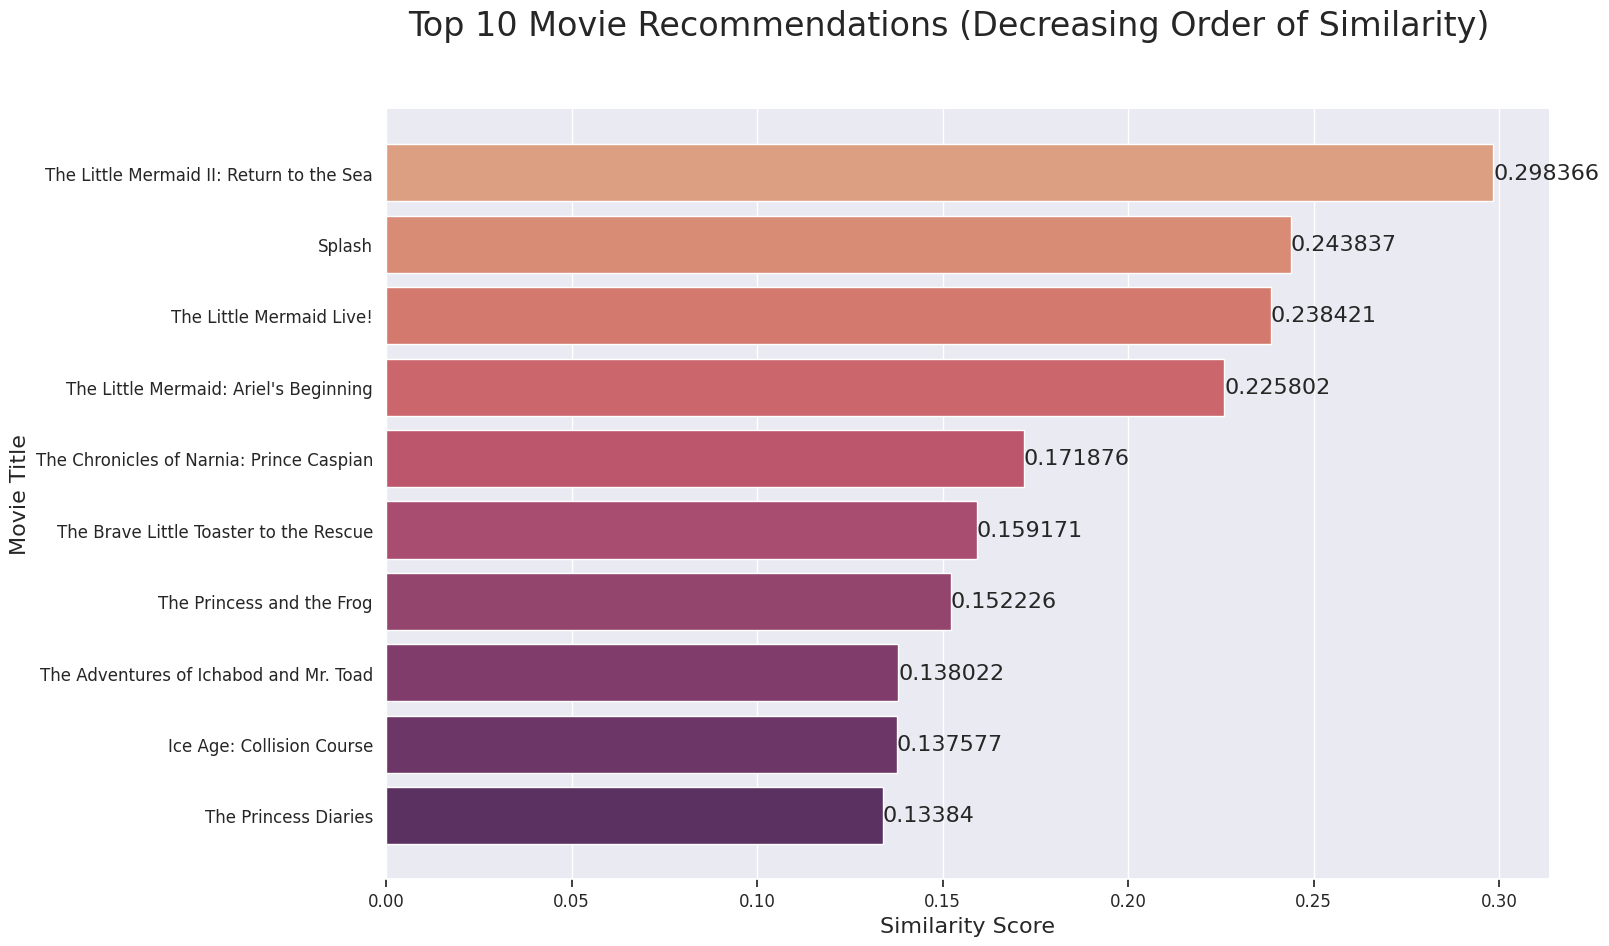

In [30]:
def similarity_plot(movies_sim, input_mov):
    fig, ax1 = plt.subplots(figsize=(15, 10), dpi=100)
    for sp in ['top', 'right', 'left']:
        ax1.spines[sp].set_visible(False)
        
    sb.barplot(data = movies_sim, palette='flare', x = input_mov, y = 'title')
    ax1.tick_params(axis='both', which='both', labelsize = 12, bottom = True, left = False)
    ax1.set_xlabel(f'Similarity Score', fontsize = 16)
    ax1.set_ylabel(f'Movie Title', fontsize = 16)
    ax1.bar_label(ax1.containers[0], fontsize = 16)
    plt.plot(color="white", lw=3)
    fig.suptitle("Top 10 Movie Recommendations (Decreasing Order of Similarity)", fontsize=24)
    plt.show()

similarity_plot(simScores, input_movie)

In [31]:
print('You just finished watching ' + input_movie + '!')
print('Great choice! Now, here\'s a selection of more amazing movies that you might like!')
print('These recommendations are ranked from being the most similar to least similar to the movie you just watched.\n')

for num in range(1, 11):
    title = recos.loc[num].at['title']
    row = disney.loc[disney['title'] == title].head(1)
    row = row.set_index(pd.Index([1]))
    description = row.loc[1].at['description']
    print(f'{num}: ' + title)
    print(description)
    print()

You just finished watching The Little Mermaid!
Great choice! Now, here's a selection of more amazing movies that you might like!
These recommendations are ranked from being the most similar to least similar to the movie you just watched.

1: The Little Mermaid II: Return to the Sea
Set several years after the first film, Ariel and Prince Eric are happily married with a daughter, Melody. In order to protect Melody from the Sea Witch, Morgana, they have not told her about her mermaid heritage. Melody is curious and ventures into the sea, where she meets new friends. But will she become a pawn in Morgana's quest to take control of the ocean from King Triton?

2: Splash
A successful businessman falls in love with the girl of his dreams. There's one big complication though; he's fallen hook, line and sinker for a mermaid.

3: The Little Mermaid Live!
A live broadcast of the beloved animated Disney tale with live performances of the songs.

4: The Little Mermaid: Ariel's Beginning
Follow Ari

## Insights/Recommendations

The final recommendation system is certainly accurate, especially when it comes to representing a list of movies that displays a diverse palette. The recommendations include a healthy balance of PG-13/PG-rated films that have high imdb_ratings. The generated list is indicative of the genre of film the user appreciates, as well as the descriptions that intrigue them. Even though our recommendation system is quite successful, there are certainly a plethora of improvements that will enhance the efficacy of its recommendations. (We'll analyze these at a deeper level in our presentation.) Consider the following:

### Collaborative Filtering

With the given dataset, content-based filtering is the only plausible approach; however, it's not necessarily the most effective when it comes to generating recommendations. Although it accounts for the characteristics of the film, including its description, genre, and actors, it fails to represent the user's preferences. In order to address these restraints, we introduce a higher-level approach called collaborative filtering, which accounts for similarities between users as well. In addition to the techniques used in content-based filtering, this model recommends films based on the interests of other users on the platform. If we consider Netflix, for instance, they generate a % Match for each film within their repertoire that indicates the chances we'll enjoy the film depending on our interests.

The biggest advantage of a collaborative filtering system is its ability to adapt to the environment of the platform. It ultimately reflects the preferences of users worldwide and the movies they enjoyed after watching a particular film. Utilizing the extensive amount of data available, the recommendation system is more likely to generate titles the user truly prefers, which bodes well for the company.

Collaborative filtering is impossible to implement with the current dataset, as we require a comprehensive list of the movies users watched, as well as their individual preferences for genres. Provided these metrics, we could certainly enhance the predictions generated and recommend more intriguing titles to the user.

### Accounting for User Preferences

As I previously mentioned, considering the preferences of the user is of utmost importance for curating the perfect list. If we're able to discover the genres the user likes, the actors whose films they appreciate, and the films trending at that time, it will formulate an exceptional list. Ultimately, we can filter out films that aren't within the scope of the search space, eliminating choices that the user won't select anyways.

## Conclusion

To summarize, the movie recommendation system that our group has developed is a way to enhance the movie-watching experience for users. Using techniques such as collaborative filtering, content-based filtering, and the TF-IDF vectorizer, users are provided with various benefits. Firstly, they give suggestions based on their preferences, prior search histories, the movies they have watched, and various other factors. Secondly, it saves users time and effort in searching for movies. Thirdly, it saves costs for users to watch movies that might interest them and matches their preferences. Overall, the movie recommendation system is a convenient and personalized way to discover new films. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=718858ad-4a91-428d-97e8-49ed4504ba89' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>